In [1]:
import pandas as pd
!pip install mlxtend

In [2]:
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
books = pd.read_csv("C:\\Users\\Factory\\Desktop\\Association Rules\\book.csv")

In [4]:
frequent_items = apriori(books, min_support = 0.005,max_len = 3, use_colnames = True)

In [5]:
frequent_items.sort_values('support',ascending= False, inplace = True)

In [6]:
rules = association_rules(frequent_items,metric="lift",min_threshold = 1)

In [7]:
rules.sort_values('lift', ascending = False, inplace = True)

In [8]:
def to_list(i):
    return sorted(i)

In [9]:
ma_x = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

In [10]:
ma_x = ma_x.apply(sorted)

In [11]:
return_rules = list(ma_x)
unique_rules = [list(m) for m in set(tuple(i) for i in return_rules)]

In [12]:
index_rules = []
for i in unique_rules:
    index_rules.append(return_rules.index(i))

In [13]:
rules_without_reducdancies = rules.iloc[index_rules, : ]

In [14]:
rules_without_reducdancies.sort_values('lift', ascending = False, inplace = True)

<ipython-input-14-c3667c2102ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_without_reducdancies.sort_values('lift', ascending = False, inplace = True)


In [15]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
750,"(RefBks, ItalArt)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
751,(ItalAtlas),"(RefBks, ItalArt)",0.0370,0.0200,0.0165,0.445946,22.297297,0.015760,1.768780
743,"(ItalAtlas, ArtBks)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
746,(ItalArt),"(ItalAtlas, ArtBks)",0.0485,0.0180,0.0165,0.340206,18.900344,0.015627,1.488344
351,"(ItalCook, ArtBks)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
354,(ItalArt),"(ItalCook, ArtBks)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
562,"(RefBks, ItalCook)",(ItalAtlas),0.0465,0.0370,0.0230,0.494624,13.368207,0.021279,1.905511
563,(ItalAtlas),"(RefBks, ItalCook)",0.0370,0.0465,0.0230,0.621622,13.368207,0.021279,2.519964
921,"(ItalAtlas, GeogBks)",(ItalArt),0.0205,0.0485,0.0115,0.560976,11.566507,0.010506,2.167306
924,(ItalArt),"(ItalAtlas, GeogBks)",0.0485,0.0205,0.0115,0.237113,11.566507,0.010506,1.283939


In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sn

In [18]:
support = rules_without_reducdancies["support"]
confidence = rules_without_reducdancies["confidence"]
lift = rules_without_reducdancies["lift"]

Text(0.5, 0, 'lift')

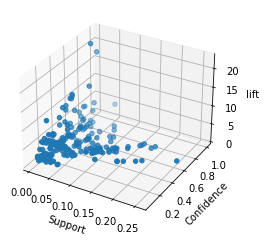

In [19]:
fig = plt.figure()
ax= fig.add_subplot(111, projection = '3d')
ax.scatter(support,confidence,lift)
ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("lift")

Text(0, 0.5, 'confidence')

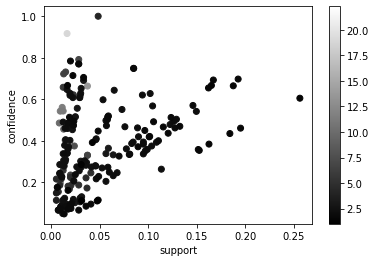

In [20]:
import scipy as sp
plt.scatter(x=support, y=confidence, c=lift , cmap = 'gray')
plt.colorbar()
plt.xlabel("support")
plt.ylabel("confidence")

In [21]:
frequent_items1 = apriori(books,min_support = 0.007,max_len = 4 , use_colnames = True)

In [22]:
frequent_items1.sort_values('support', ascending = False, inplace = True)

In [23]:
rules2 = association_rules(frequent_items1 , metric = 'lift' , min_threshold = 1)

In [24]:
rules2.sort_values('lift',ascending = False , inplace = True)

In [25]:
def to_list1(i):
    return(sorted(i))

In [26]:
ma_x1 = rules2.antecedents.apply(to_list1)+ rules2.consequents.apply(to_list1)

In [27]:
ma_x1 = ma_x1.apply(sorted)

In [28]:
return_rules1 = list(ma_x1)
unique_rules1 = [list(m) for m in set(tuple(i) for i  in return_rules1 )]

In [29]:
index_rules1 = []
for i in unique_rules1:
    index_rules1.append(return_rules1.index(i))

In [30]:
rules_without_reduc = rules2.iloc[index_rules1,:]

In [31]:
rules_without_reduc.sort_values('lift', ascending = False, inplace = True)

<ipython-input-31-e2229c2309b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_without_reduc.sort_values('lift', ascending = False, inplace = True)


In [32]:
support2 = rules_without_reduc["support"]
confidence2 =  rules_without_reduc["confidence"]
lift2 = rules_without_reduc["lift"]

Text(0.5, 0, 'lift')

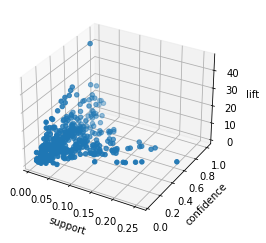

In [33]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support2,confidence2,lift2)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

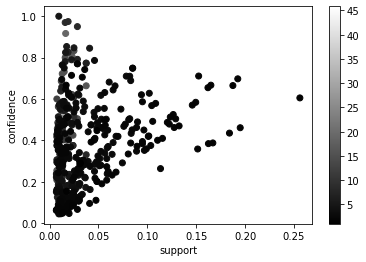

In [34]:
plt.scatter(support2,confidence2, c =lift2, cmap = 'gray')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")

In [35]:
frequent_items2 = apriori(books, min_support = 0.1 , max_len = 3,use_colnames = True)

In [36]:
frequent_items2.sort_values('support', ascending = False, inplace = True)

In [37]:
rules3 = association_rules(frequent_items2, metric = 'lift', min_threshold = 1 )

In [38]:
rules3.sort_values('lift',ascending = False , inplace = True)

In [39]:
def to_list3(i):
    return(sorted(i))

In [40]:
max_x2 = rules3.antecedents.apply(to_list3)+rules3.consequents.apply(to_list3)

In [41]:
max_x2 = max_x2.apply(sorted)

In [42]:
return_rules3 = list(max_x2)
unique_rules3 = [list(m) for m in set(tuple(i) for i in return_rules3)]

In [43]:
index_rules3=[]
for i in unique_rules3:
    index_rules3.append(return_rules3.index(i))

In [44]:
rules_without_reduc1 = rules3.iloc[index_rules3,:] 

In [45]:
rules_without_reduc1.sort_values('lift', ascending = False, inplace = True)

<ipython-input-45-478d21e804a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rules_without_reduc1.sort_values('lift', ascending = False, inplace = True)


In [46]:
support3 = rules_without_reduc1["support"]
confidence3 =  rules_without_reduc1["confidence"]
lift3 = rules_without_reduc1["lift"]

Text(0.5, 0, 'lift')

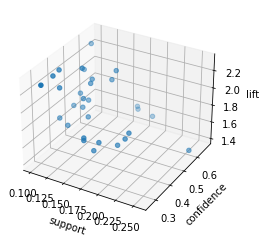

In [47]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection = '3d')
ax3.scatter(support3,confidence3,lift3)
ax3.set_xlabel("support")
ax3.set_ylabel("confidence")
ax3.set_zlabel("lift")

Text(0, 0.5, 'Confidence')

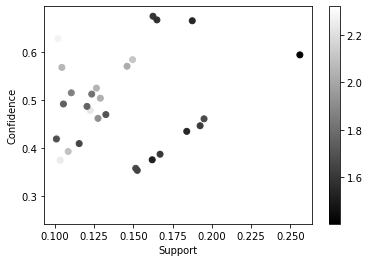

In [48]:
plt.scatter(support3, confidence3, c=lift3 , cmap='gray')
plt.colorbar()
plt.xlabel("Support");plt.ylabel("Confidence")